In [1157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [1158]:
data = pd.read_csv("neo.csv")

# Data analysis

In [1159]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [1160]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [1161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [1162]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [1163]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [1164]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [1165]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

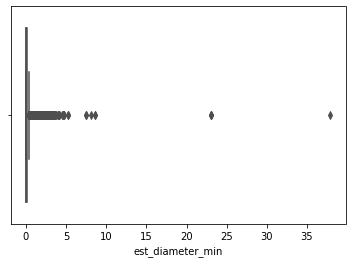

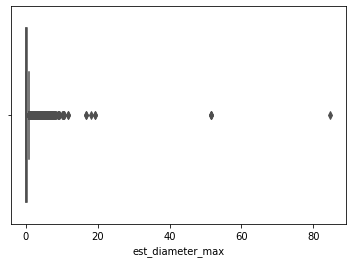

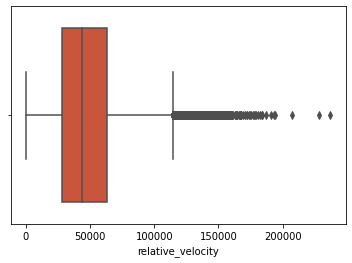

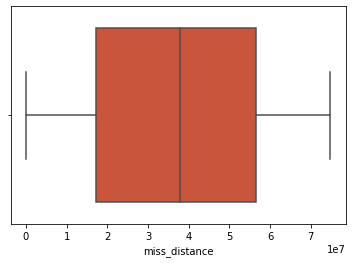

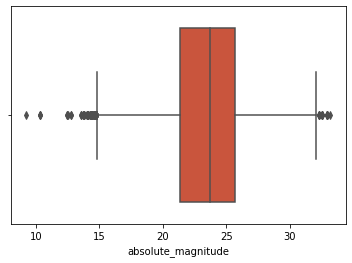

In [1166]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

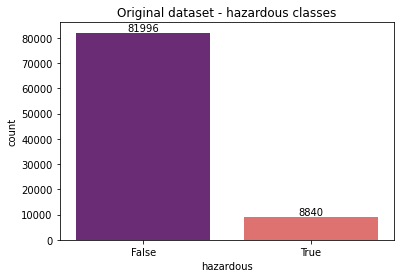

In [1167]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Original dataset - hazardous classes")
plt.show()

In [1168]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [1169]:
# Splitting the data into Training & Testing
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [1170]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68127, 5)
(22709, 5)
(68127,)
(22709,)


In [1171]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [1172]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue", "RecalTrue"])

In [1173]:
import warnings
warnings.filterwarnings("ignore")

In [1174]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
# XGB
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Classification report on Testing split:")
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 6:
        results.loc[len(results.index)] = ["XGB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

def crossval(m):
    print("Cross-validation on Training split (mean):")
    for i in ["accuracy","precision","recall"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

# Trying the first two models

Cross-validation on Training split (mean):
ACCURACY
0.9031514678495105
PRECISION
0.0
RECALL
0.0


Score of the training dataset: 0.9031514671128921
Score of the testing dataset: 0.901272623189044 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20467
        True       0.00      0.00      0.00      2242

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



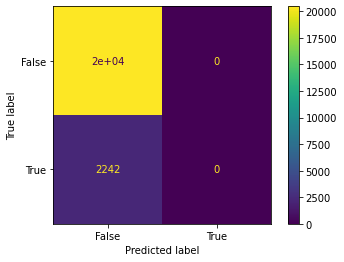

In [1175]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.8976323698487916
PRECISION
0.277692316549366
RECALL
0.035616169274243575


Score of the training dataset: 0.8976030061502781
Score of the testing dataset: 0.8952838081817781 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     20467
        True       0.28      0.04      0.07      2242

    accuracy                           0.90     22709
   macro avg       0.59      0.51      0.51     22709
weighted avg       0.84      0.90      0.86     22709



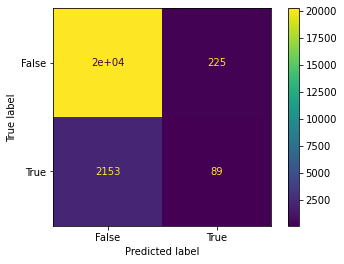

In [1176]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

# Feature engineering

In [1177]:
def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.")
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled = scaler.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(scaled,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.")
        from sklearn.preprocessing import MinMaxScaler
        norm = MinMaxScaler()
        normed = norm.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(normed,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.")


def classdist(classd):
    global xTrain, yTrain
    if classd == "over":
        print("You have selected Oversampling.")
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(sampling_strategy="minority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    elif classd == "smote":
        print("You have selected SMOTE.")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state = 42)
        xTrain, yTrain = smote.fit_resample(xTrain, yTrain)
    elif classd == "under":
        print("You have selected Undersampling.")
        from imblearn.under_sampling import RandomUnderSampler
        ros = RandomUnderSampler(sampling_strategy="majority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    else:
        print("You didn't select any class sampling technique, proceeding with the original dataset.")



In [1178]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue","RecalTrue"])

In [1179]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("norm")

You have selected Normalization.


In [1180]:
# CLASS SAMPLING
# Oversampling - "over"
# SMOTE - "smote"
# Undersampling - "under"
# None - "none"
classdist("smote")

You have selected SMOTE.


In [1181]:
xTrain.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.000106,0.000106,0.151236,0.394904,0.816437
1,0.005556,0.005556,0.330208,0.642024,0.470171
2,0.000369,0.000369,0.137060,0.038921,0.712140
3,0.000407,0.000407,0.183638,0.849551,0.703796
4,0.003839,0.003839,0.200854,0.743651,0.503546


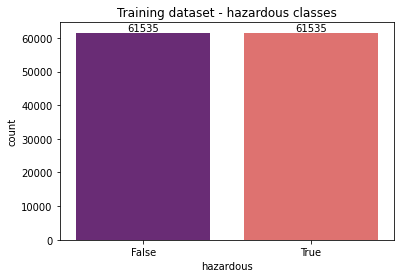

In [1182]:
haz = sns.countplot(x=yTrain, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Training dataset - hazardous classes")
plt.show()

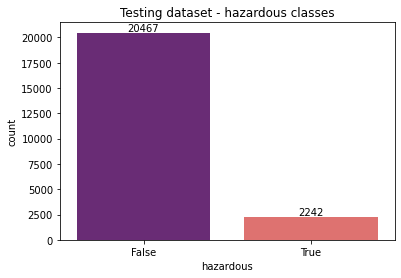

In [1183]:
haz1 = sns.countplot(x=yTest, palette="magma")
haz1.bar_label(haz1.containers[0])
plt.title("Testing dataset - hazardous classes")
plt.show()

# ML models

Cross-validation on Training split (mean):
ACCURACY
0.8468026326480864
PRECISION
0.802039301293816
RECALL
0.9209230519216707


Score of the training dataset: 0.8476233038108394
Score of the testing dataset: 0.8993791007970409 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20467
        True       0.00      0.00      0.00      2242

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



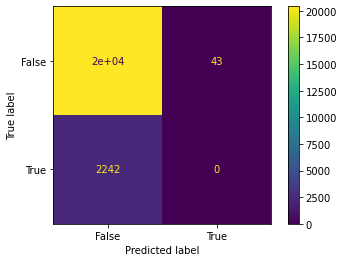

In [1184]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import cross_val_score
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.8045096286666127
PRECISION
0.7951062837456602
RECALL
0.8204599008694238


Score of the training dataset: 0.8047046396359795
Score of the testing dataset: 0.8979699678541547 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20467
        True       0.00      0.00      0.00      2242

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



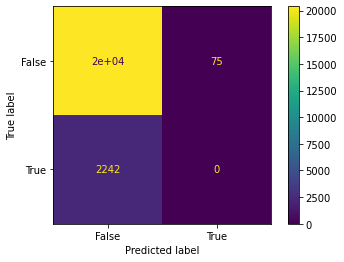

In [1185]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

Cross-validation on Training split (mean):
ACCURACY
0.923450069066385
PRECISION
0.9257422117118915
RECALL
0.9210855610628098


Score of the training dataset: 1.0
Score of the testing dataset: 0.11999647716764278 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.02      0.05     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.12     22709
   macro avg       0.55      0.51      0.11     22709
weighted avg       0.91      0.12      0.06     22709



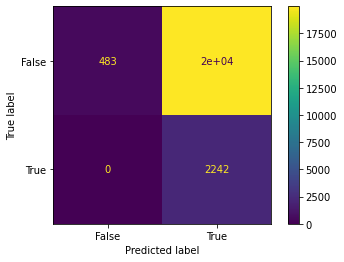

In [1186]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
crossval(DTR)
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.10348320049319654 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.01      0.01     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.10     22709
weighted avg       0.91      0.10      0.03     22709



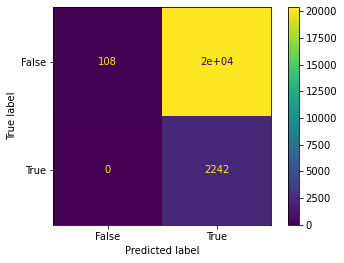

In [1187]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
# crossval(RFC)
classificationmodel(RFC)

Score of the training dataset: 0.9381896481677094
Score of the testing dataset: 0.8065084327799551 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      0.88      0.89     20467
        True       0.08      0.09      0.08      2242

    accuracy                           0.81     22709
   macro avg       0.49      0.49      0.49     22709
weighted avg       0.82      0.81      0.81     22709



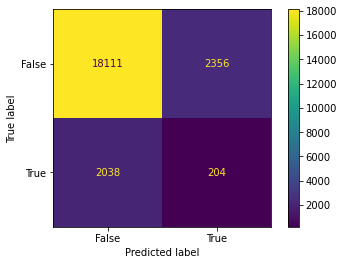

In [1188]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
# crossval(KNNC)
classificationmodel(KNNC)

Score of the training dataset: 0.8834403185179166
Score of the testing dataset: 0.10321898806640539 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.00      0.01     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.10     22709
weighted avg       0.91      0.10      0.03     22709



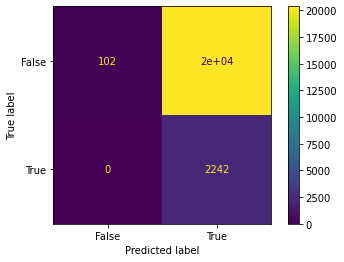

In [1189]:
# Gradien Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
#crossval(GBC)
classificationmodel(GBC)

Score of the training dataset: 0.9317786625497684
Score of the testing dataset: 0.10414373156017438 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.01      0.01     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.10     22709
weighted avg       0.91      0.10      0.03     22709



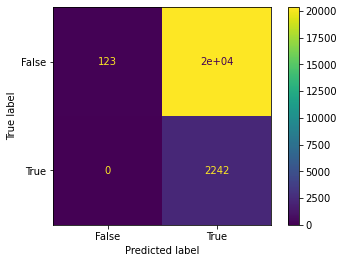

In [1190]:
# XGBoost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
# #crossval(XGB)
classificationmodel(XGB)

In [1191]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.847623,0.899379,0.000000,0.00000
1,GNB,0.804705,0.897970,0.000000,0.00000
2,DTC,1.000000,0.119996,0.100873,1.00000
3,RFC,1.000000,0.103483,0.099199,1.00000
4,KNN,0.938190,0.806508,0.079687,0.09099
5,GBC,0.883440,0.103219,0.099173,1.00000
6,XGB,0.931779,0.104144,0.099265,1.00000


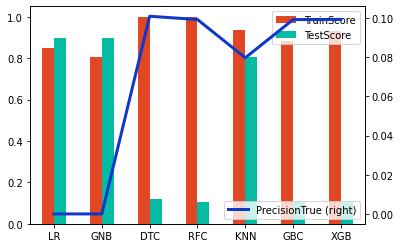

In [1192]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
plt.legend()
plt.show()

In [1193]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))
results.loc[len(results.index)] = ["DTC2", DTC2.score(xTrain, yTrain), DTC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9757048833996912
Score of testing dataset: 0.09960808490025981
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.09     22709
weighted avg       0.91      0.10      0.02     22709



In [1194]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))
results.loc[len(results.index)] = ["RFC2", RFC2.score(xTrain, yTrain), RFC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9887949947184529
Score of testing dataset: 0.10308688185300982
              precision    recall  f1-score   support

       False       1.00      0.00      0.01     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.10     22709
weighted avg       0.91      0.10      0.03     22709



Score of the training dataset: 0.943877468107581
Score of the testing dataset: 0.901272623189044 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20467
        True       0.00      0.00      0.00      2242

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



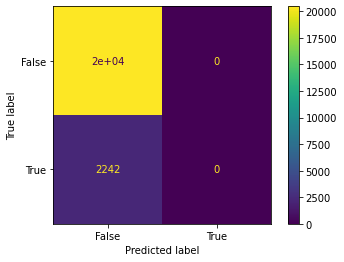

In [1195]:
RFC3 = RandomForestClassifier(max_depth=32, class_weight={False:0.1,True:0.9})
classificationmodel(RFC3)

Score of the training dataset: 0.9830096692938978
Score of the testing dataset: 0.09947597868686424 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.09     22709
weighted avg       0.91      0.10      0.02     22709



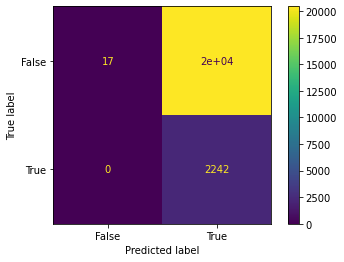

In [1196]:
RFC4 = RandomForestClassifier(max_depth=32, class_weight={False:0.9,True:0.1})
classificationmodel(RFC4)

Score of the training dataset: 0.9896237913382627
Score of the testing dataset: 0.1027786340217535 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.00      0.01     20467
        True       0.10      1.00      0.18      2242

    accuracy                           0.10     22709
   macro avg       0.55      0.50      0.09     22709
weighted avg       0.91      0.10      0.03     22709



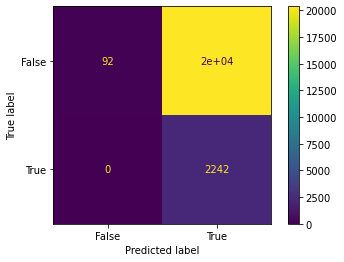

In [1197]:
RFC5 = RandomForestClassifier(max_depth=32, class_weight="balanced_subsample")
classificationmodel(RFC5)

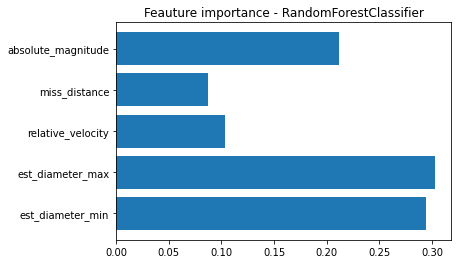

In [1198]:
plt.barh(RFC5.feature_names_in_, RFC5.feature_importances_)
plt.title("Feauture importance - RandomForestClassifier")
plt.show()

In [1199]:
impo = pd.Series(RFC5.feature_importances_, index=xTrain.columns)
impo

est_diameter_min      0.294683
est_diameter_max      0.302987
relative_velocity     0.103405
miss_distance         0.087076
absolute_magnitude    0.211849
dtype: float64

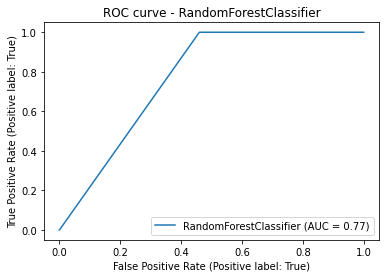

In [1200]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFC5, xTest, yTest) 
plt.title("ROC curve - RandomForestClassifier")
plt.show()

# Results

In [1201]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.847623,0.899379,0.000000,0.00000
1,GNB,0.804705,0.897970,0.000000,0.00000
2,DTC,1.000000,0.119996,0.100873,1.00000
3,RFC,1.000000,0.103483,0.099199,1.00000
4,KNN,0.938190,0.806508,0.079687,0.09099
5,GBC,0.883440,0.103219,0.099173,1.00000
6,XGB,0.931779,0.104144,0.099265,1.00000
7,DTC2,0.975705,0.099608,0.098814,1.00000
8,RFC2,0.988795,0.103087,0.099160,1.00000
